In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv2
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
from skimage.transform import pyramid_gaussian
import imutils

In [ ]:
# загрузка wav файла


Shape of Signal: (23994,)
Signal Datatype: int16
Signal duration: 0.54 seconds


/var/folders/49/7n60k7011n11zcdptxxpmvvh0000gn/T/ipykernel_57678/2282885449.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  freq_sample, sig_audio = wavfile.read("content/Practice-Pad-Single-Stroke.wav")


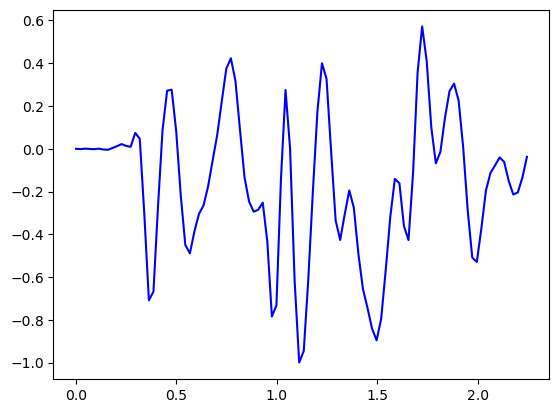

In [ ]:
from scipy.io import wavfile
freq_sample, sig_audio = wavfile.read("content/Practice-Pad-Single-Stroke.wav")
# Output the parameters: Signal Data Type, Sampling Frequency and Duration
print('\nShape of Signal:', sig_audio.shape)
print('Signal Datatype:', sig_audio.dtype)
print('Signal duration:', round(sig_audio.shape[0] / float(freq_sample), 2), 'seconds')

# Normalize the Signal Value and Plot it on a graph
pow_audio_signal = sig_audio / np.power(2, 15)
pow_audio_signal = pow_audio_signal [:100]
time_axis = 1000 * np.arange(0, len(pow_audio_signal), 1) / float(freq_sample)
plt.plot(time_axis, pow_audio_signal, color='blue')

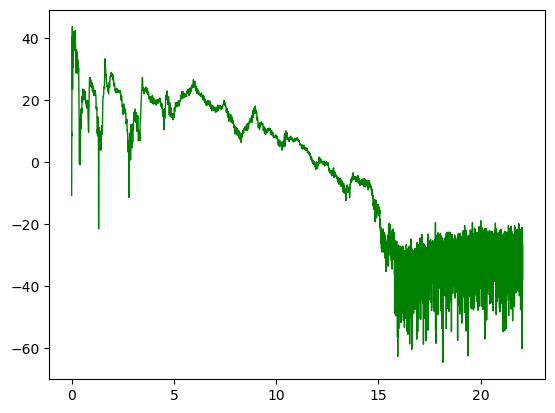

In [ ]:
# Working on the same input file
# Extracting the length and the half-length of the signal to input to the foruier transform
sig_length = len(sig_audio)
half_length = np.ceil((sig_length + 1) / 2.0).astype(int)
# We will now be using the Fourier Transform to form the frequency domain of the signal
signal_freq = np.fft.fft(sig_audio)
# Normalize the frequency domain and square it
signal_freq = abs(signal_freq[0:half_length]) / sig_length
signal_freq **= 2
transform_len = len(signal_freq)
# The Fourier transformed signal now needs to be adjusted for both even and odd cases
if sig_length % 2:
  signal_freq[1:transform_len] *= 2
else:
  signal_freq[1:transform_len-1] *= 2
# Extract the signal's strength in decibels (dB)
exp_signal = 10 * np.log10(signal_freq)
x_axis = np.arange(0, half_length, 1) * (freq_sample / sig_length) / 1000.0
plt.plot(x_axis, exp_signal, color='green', linewidth=1)

[8.34664224e-02 6.54494902e+00 3.42111463e+00 ... 1.89863290e-03
 2.13393534e-03 1.58419478e-04]


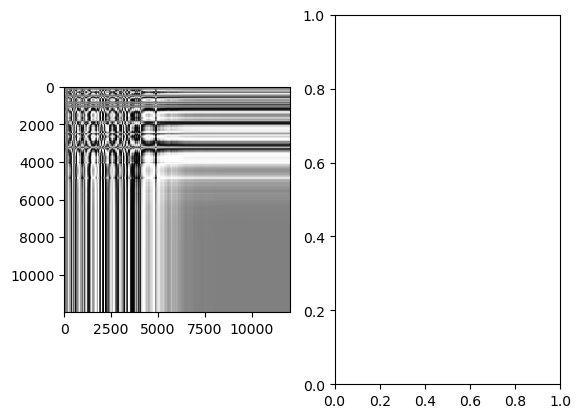

In [ ]:
#convert to the image
x = signal_freq
print(x)
X, Y = np.meshgrid(x, x)
wavelength = 100
angle = np.pi/9
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)
plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(grating)
# Calculate Fourier transform of grating
#ft = np.fft.ifftshift(grating)
#ft = np.fft.fft2(ft)
#ft = np.fft.fftshift(ft)
plt.subplot(122)
# plt.imshow(abs(x))
#plt.xlim([480, 520])
#plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

# Заставить работать 
'''plt.imshow(abs(x))'''

1. Нормировать. чтобы каждое значение было от 0 до 255
2. разделить исходный массив так, чтобы получилась 2-мерная матрица

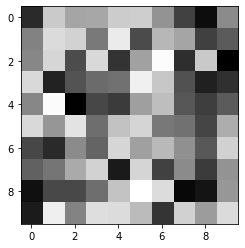

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import util

x = signal_freq


x_norm = util.img_as_ubyte(x)


x_reshaped = x_norm.reshape((10, 10))


plt.imshow(x_reshaped, cmap='gray')
plt.show()
